In [37]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [38]:


def parse_line(line):
    parts = line.strip().split(',')
    # Get frame number
    frame_part = parts[0]
    frame_str = frame_part.split()[0]  # 'Frame_600:'
    frame_num = int(frame_str.split('_')[1].rstrip(':'))
    # Get loss
    loss_part = parts[-1].strip()  # 'Loss:0.0005'
    loss_value = float(loss_part.split(':')[1])
    return frame_num, loss_value

base_dir = '../checkpoints/result_density/'
datasets = ['Beauty', 'HoneyBee', 'Jockey']
data = {}



C:\Users\Longan Wang\AppData\Local\Temp\ipykernel_35932\3278662759.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')


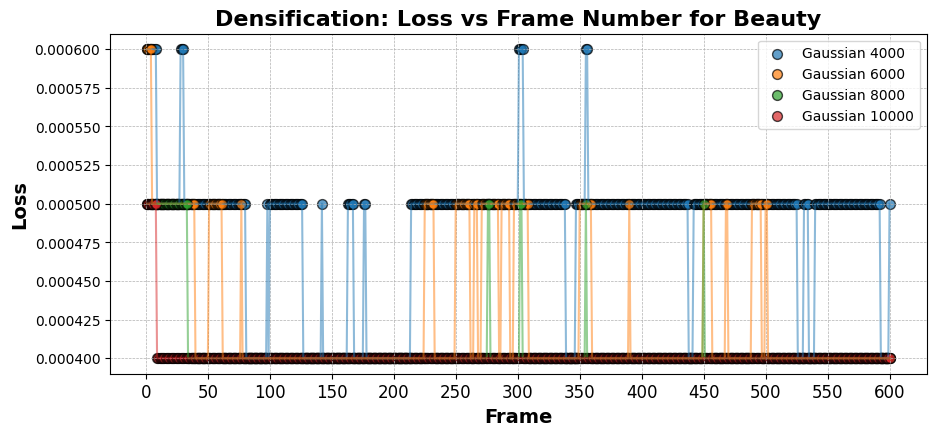

Plot saved as ./d_loss_vs_frame_Beauty.png


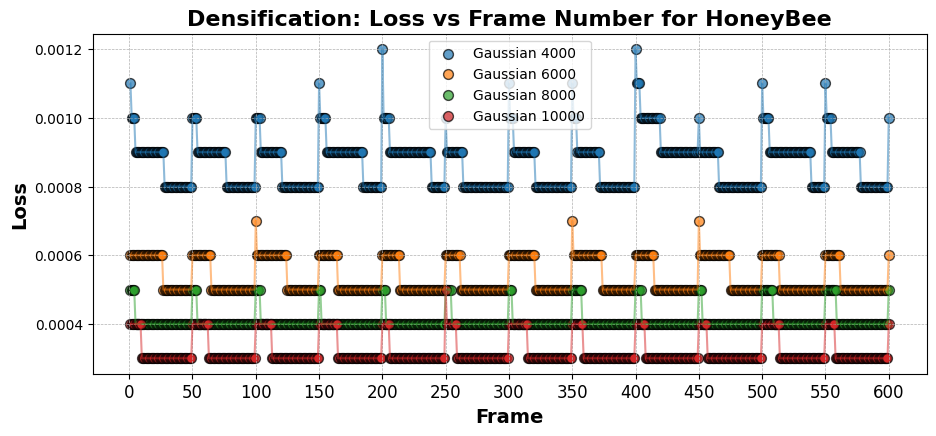

Plot saved as ./d_loss_vs_frame_HoneyBee.png


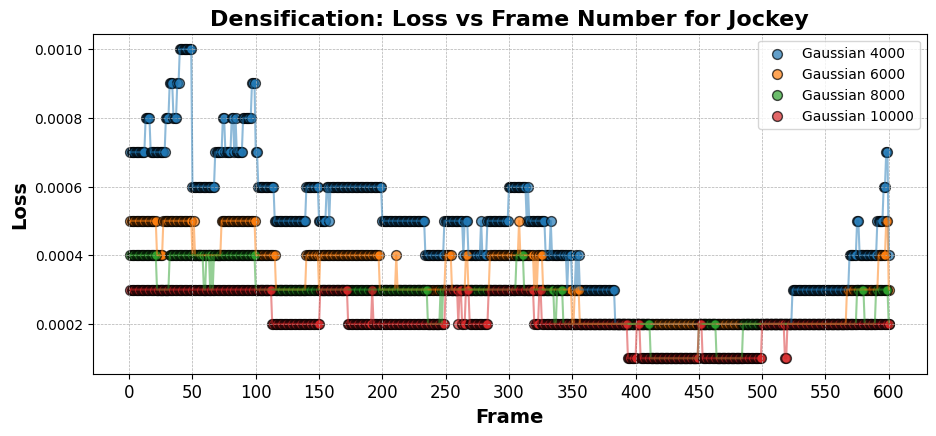

Plot saved as ./d_loss_vs_frame_Jockey.png


In [39]:
for dataset in datasets:
    data[dataset] = {}
    dataset_path = os.path.join(base_dir, dataset)
    for dir_name in os.listdir(dataset_path):
        if dir_name.startswith('GaussianImage_Cholesky'):
            gaussian_count = int(dir_name.split('_')[-1])
            if gaussian_count > 2000:
                train_txt_path = os.path.join(dataset_path, dir_name, 'train.txt')
                # Initialize data structure
                data[dataset][gaussian_count] = {'frames': [], 'losses': []}
                # Read train.txt
                with open(train_txt_path, 'r') as f:
                    lines = f.readlines()
                    # Exclude last line
                    lines = lines[:-1]
                    for line in lines:
                        frame_num, loss_value = parse_line(line)
                        data[dataset][gaussian_count]['frames'].append(frame_num)
                        data[dataset][gaussian_count]['losses'].append(loss_value)

for dataset in datasets:
    plt.figure(figsize=(10, 5))
    # Using a color map for consistent coloring
    colors = plt.cm.get_cmap('tab10')
    color_index = 0
    for gaussian_count in sorted(data[dataset].keys()):
        frames = data[dataset][gaussian_count]['frames']
        losses = data[dataset][gaussian_count]['losses']
        # Sort frames and losses
        sorted_pairs = sorted(zip(frames, losses))
        frames_sorted, losses_sorted = zip(*sorted_pairs)
        # Plot scatter and line plots
        color = colors(color_index % 10)
        plt.scatter(
            frames_sorted, losses_sorted, color=color, alpha=0.7, s=50,
            label=f'Gaussian {gaussian_count}', edgecolor='black'
        )
        plt.plot(frames_sorted, losses_sorted, color=color, alpha=0.5)
        color_index += 1
    # Set labels and title with specified font sizes and weights
    plt.xlabel('Frame', fontsize=14, fontweight='bold')
    plt.ylabel('Loss', fontsize=14, fontweight='bold')
    plt.title(f'Densification: Loss vs Frame Number for {dataset}', fontsize=16, fontweight='bold')
    # Set x-axis ticks at intervals of 50
    min_frame = min([min(data[dataset][g]['frames']) for g in data[dataset]])
    max_frame = max([max(data[dataset][g]['frames']) for g in data[dataset]])
    plt.xticks(np.arange(min_frame-1, max_frame + 1, 50), fontsize=12)
    # Add grid with specified style
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    # Adjust layout and save the figure
    plt.tight_layout(pad=3.0)
    output_image_path = f'./d_loss_vs_frame_{dataset}.png'
    plt.savefig(output_image_path, dpi=300)
    plt.show()
    print(f"Plot saved as {output_image_path}")
